In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score

Compare the results from:
- Random forest
- Arima
- LSTM
- Benchmark

In [11]:
def loadData(path):
    data = pd.read_csv(path,index_col=0)
    data.index.rename('id', inplace=True)
    
    return data
    

def printSummary(data, name):
    print(f'{name}: mean MSE \t{data["mse"].mean()}\t std MSE {data["mse"].std()}\t mean r2 {data["r2"].mean()}\t correct {data["corr"].mean()}')

arima = loadData('results/arima.csv')
benchmark = loadData('results/benchmark.csv')
printSummary(benchmark, "Benchmark")
printSummary(arima, "ARIMA")

print(arima[["mse", "r2", "corr"]].describe())
print(benchmark.describe())

Benchmark: mean MSE 	0.5879985520662917	 std MSE 0.426128002596563	 mean r2 -0.553779876123818	 correct 0.5248885147606954
ARIMA: mean MSE 	0.2946283115341072	 std MSE 0.3010734346790197	 mean r2 -0.07497976166785703	 correct 0.7196049834938725
             mse         r2       corr
count  27.000000  27.000000  27.000000
mean    0.294628  -0.074980   0.719605
std     0.301073   0.671286   0.216343
min     0.011849  -2.521870   0.300000
25%     0.096874  -0.086189   0.550505
50%     0.234177   0.092868   0.750000
75%     0.415281   0.230795   0.912879
max     1.456790   0.619072   1.000000
             mse         r2       corr
count  27.000000  27.000000  27.000000
mean    0.587999  -0.553780   0.524889
std     0.426128   0.392889   0.142155
min     0.179716  -1.365971   0.291667
25%     0.318261  -0.827157   0.408786
50%     0.534937  -0.567360   0.500000
75%     0.638203  -0.310628   0.623497
max     2.296435   0.264303   0.787234


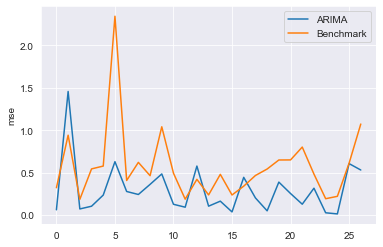

In [3]:
sns.set_style("darkgrid")

amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['mse'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['mse'], label="Benchmark")
plt.savefig('figures/mse_line.png', dpi=300)

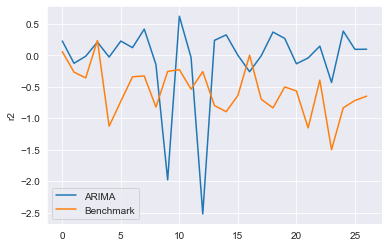

In [4]:
amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['r2'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['r2'], label="Benchmark")
plt.savefig('figures/r2_line.png', dpi=300)

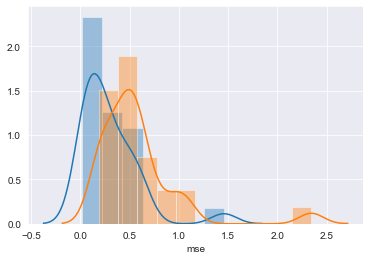

In [6]:
sns.distplot(arima['mse'], label="ARIMA")
sns.distplot(benchmark['mse'], label="Benchmark")
plt.savefig('figures/mse_dist.png', dpi=300)

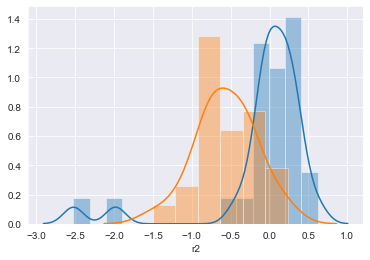

In [7]:
sns.distplot(arima['r2'], label="ARIMA")
sns.distplot(benchmark['r2'], label="Benchmark")
plt.savefig('figures/r2_dist.png', dpi=300)